In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# scientific units
#from quantities import units
import utils # all datareading and preprocessing functionality

# Minimal TF-IDF bait
Goal: to get a minimal TF-IDF vector that can be used to assess similarity (neighborhood)

In [2]:
file1 = './data/abstract_set1.txt' # pesticides
file2 = './data/abstract_set2.txt' # cancer-ish
data_selection = 'abstract_clean'
label_selection = 'text_label'

# the custom class Tokenizer can also lemmatize, and remove short words, digits and stopwords
stopwords = utils.get_stopwords(custom = {'wa', 'use', 'using', 'one', 'two', 'three', 'study'}) 

tokenizer = utils.Tokenizer(stop_words=stopwords, min_length=3)

In [3]:
tst = pd.read_csv(file2, sep='\t')
print(tst.dtypes)
print(tst.shape)

pmid         int64
title       object
abstract    object
dtype: object
(4949, 3)


In [4]:
data = utils.read_abstract_data(negatives_path=file2, 
                                positives_path=file1,  
                                text_labels = ["control", "pesticide"])
#data = utils.read_abstract_data(file1, file2)

utils.preprocess_text(data)
data.tail()

,pmid,title,abstract,label,text_label,title_clean,abstract_clean
9105,39399211,Cytotoxicity induced by three commercial neoni...,Background: Neonicotinoid insecticides are use...,1,pesticide,cytotoxicity induced by three commercial neoni...,background: neonicotinoid insecticides are use...
9106,39406000,Mutations in target gene confers resistance to...,Echinochloa phyllopogon is a noxious weed that...,1,pesticide,mutations in target gene confers resistance to...,echinochloa phyllopogon is a noxious weed that...
9107,39411656,Genome-wide association study reveals the gene...,Crop resistance to herbicides is crucial for a...,1,pesticide,genome-wide association study reveals the gene...,crop resistance to herbicides is crucial for a...
9108,39411737,Serum 25 hydroxycholecalciferol in periodontit...,Background: Very few studies have examined the...,1,pesticide,serum 25 hydroxycholecalciferol in periodontit...,background: very few studies have examined the...
9109,39427538,Soybean isoflavones protect dopaminergic neuro...,Atrazine (ATR) is a broad-spectrum herbicide w...,1,pesticide,soybean isoflavones protect dopaminergic neuro...,atrazine (atr) is a broad-spectrum herbicide w...


In [5]:
data.shape

(9110, 7)

In [6]:
data[data['pmid'] == 29981025] # set 2
#data.iloc[0, :]

,pmid,title,abstract,label,text_label,title_clean,abstract_clean
0,29981025,Impact of Neoadjuvant Chemotherapy on Breast C...,"BACKGROUND: Breast cancer subtype, as determin...",0,control,impact of neoadjuvant chemotherapy on breast c...,"background: breast cancer subtype, as determin..."


In [7]:
data[data['pmid'] == 29990300] # set 1

,pmid,title,abstract,label,text_label,title_clean,abstract_clean
4418,29990300,Oxidative stress in triazine pesticide toxicit...,This review article provides a summary of the ...,1,pesticide,oxidative stress in triazine pesticide toxicit...,this review article provides a summary of the ...


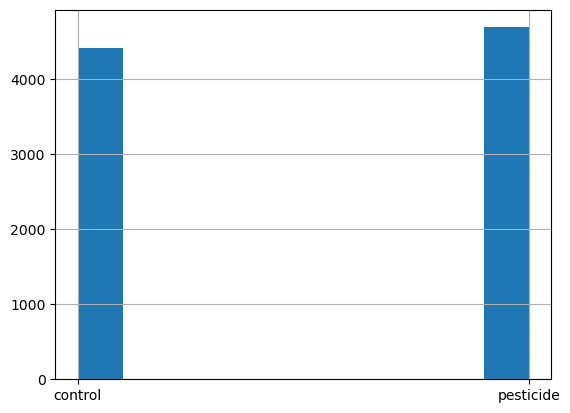

In [8]:
data[label_selection].hist();

In [9]:

vectorizer = TfidfVectorizer(tokenizer=tokenizer, max_features=5000)

# create a data matrix from the overviews
X = vectorizer.fit_transform(data[data_selection])
X

/Users/michielnoback/opt/miniconda3/envs/nlp/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<9110x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 606723 stored elements in Compressed Sparse Row format>

In [10]:
# generate a mapping from paper pubmed id -> index (in df)
paper2idx = pd.Series(data.index, index=data['pmid'])
#paper2idx.head()

In [11]:
query_pmid = 29990732 #29981025 #29990732
query_index = paper2idx[query_pmid]
query_index

4419

In [12]:
query = data.loc[query_index]
print(type(query))
print(query)

<class 'pandas.core.series.Series'>
pmid                                                       29990732
title             Toxicity induced by glyphosate and glyphosate-...
abstract          Glyphosate is the active component of many com...
label                                                             1
text_label                                                pesticide
title_clean       toxicity induced by glyphosate and glyphosate-...
abstract_clean    glyphosate is the active component of many com...
Name: 4419, dtype: object


In [13]:
# x_train.loc[query_index]
# this checks out -- the same record
query_vec = X[query_index]
#print(query_vec)
# print the query vector
query_vec.toarray()
query_vec

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 55 stored elements in Compressed Sparse Row format>

In [14]:
# compute similarity between query and every vector in X
scores = cosine_similarity(query_vec, X)
scores.shape # for every abstract a score is calculated

(1, 9110)

In [15]:
# currently the array is 1 x N, make it just a 1-D array
scores = scores.flatten()
scores

array([0.00427185, 0.0057081 , 0.01720042, ..., 0.18599608, 0.01520453,
       0.0634719 ])

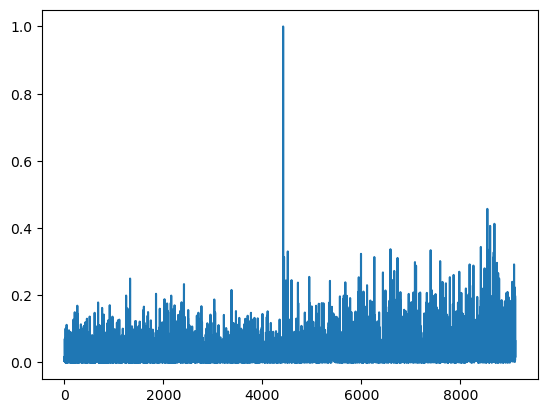

In [16]:
plt.plot(scores);

In [17]:
# # compare with euclidean
# scores = euclidean_distances(query_vec, X)
# scores = scores.flatten()
# print(scores)
# plt.plot(scores);

# ## TODO investigate further

<module 'utils' from '/Users/michielnoback/git_projects/pesticides/utils.py'>

In [19]:
utils.print_paper(pmid, data) # input paper

PubMed ID: 29981025

Title: 
Impact of Neoadjuvant Chemotherapy on Breast Cancer Subtype: Does Subtype Change
and, if so, How? : IHC Profile and Neoadjuvant Chemotherapy.

Abstract:
BACKGROUND: Breast cancer subtype, as determined by the expression of estrogen
receptor (ER) and progesterone receptor (PR), together defined as hormone
receptor (HR) status, and the HER2/neu receptor (HER2), is important in
predicting prognosis and guiding therapy. Knowledge regarding how tumors evolve
during treatment and whether subtype is influenced by neoadjuvant chemotherapy
(nCT) is limited. The purpose of this study was to compare the HR and HER2
status between core needle biopsy and residual tumor after surgery of breast
cancer patients treated with nCT and to evaluate the impact of status change on
therapeutic management. METHODS: After institutional review board approval, we
performed a retrospective review of all patients with a diagnosis of breast
cancer who received nCT and had their initial b

In [20]:
utils.print_paper(recommendations.iloc[0, 0], data)

PubMed ID: 29981025

Title: 
Impact of Neoadjuvant Chemotherapy on Breast Cancer Subtype: Does Subtype Change
and, if so, How? : IHC Profile and Neoadjuvant Chemotherapy.

Abstract:
BACKGROUND: Breast cancer subtype, as determined by the expression of estrogen
receptor (ER) and progesterone receptor (PR), together defined as hormone
receptor (HR) status, and the HER2/neu receptor (HER2), is important in
predicting prognosis and guiding therapy. Knowledge regarding how tumors evolve
during treatment and whether subtype is influenced by neoadjuvant chemotherapy
(nCT) is limited. The purpose of this study was to compare the HR and HER2
status between core needle biopsy and residual tumor after surgery of breast
cancer patients treated with nCT and to evaluate the impact of status change on
therapeutic management. METHODS: After institutional review board approval, we
performed a retrospective review of all patients with a diagnosis of breast
cancer who received nCT and had their initial b

In [21]:
utils.print_paper(recommendations.iloc[1, 0], data)

PubMed ID: 25998416

Title: 
From bench to bedside: What do we know about hormone receptor-positive and human
epidermal growth factor receptor 2-positive breast cancer?

Abstract:
Breast cancer is a heterogeneous disease. Thanks to extensive efforts from
research scientists and clinicians, treatment for breast cancer has advanced
into the era of targeted medicine. With the use of several well-established
biomarkers, such as hormone receptors (HRs) (i.e., estrogen receptor [ER] and
progesterone receptor [PgR]) and human epidermal growth factor receptor-2
(HER2), breast cancer patients can be categorized into multiple subgroups with
specific targeted treatment strategies. Although therapeutic strategies for HR-
positive (HR+) HER2-negative (HER2-) breast cancer and HR-negative (HR-)
HER2-positive (HER2+) breast cancer are well-defined, HR+ HER2+ breast cancer is
still an overlooked subgroup without tailored therapeutic options. In this
review, we have summarized the molecular characteris

In [22]:
utils.print_paper(recommendations.iloc[2, 0], data)

PubMed ID: 22213087

Title: 
Association of estrogen receptor, progesterone receptor, and human epidermal
growth factor receptor 2 status with total choline concentration and tumor
volume in breast cancer patients: an MRI and in vivo proton MRS study.

Abstract:
The association of estrogen receptor, progesterone receptor, and human epidermal
growth factor receptor 2 (HER2) status of breast cancer patients with total
choline (tCho) concentration and tumor volume was investigated using in vivo
proton magnetic resonance spectroscopy and MRI at 1.5 T. Values for tCho
concentration were determined in 120 locally advanced breast cancer patients
(stages IIB, IIIA, IIIB, and IIIC), 31 early breast cancer patients (stage IIA),
38 patients with benign lesions, and 37 controls. Significantly higher tCho
concentration and lower tumor volume were observed in early breast cancer
patients compared to locally advanced breast cancer patients (P<0.05). tCho
concentration and tumor volume did not correla

In [24]:
pmid = 29981025 #29990732 #29981025
print(f"Recommendations for {pmid}:")
recommendations = utils.recommend(pmid, data, paper2idx, X, top_n_papers=8)
print(recommendations)

Recommendations for 29981025:
          pmid                                              title     score
0     29981025  Impact of Neoadjuvant Chemotherapy on Breast C...  1.000000
2634  25998416  From bench to bedside: What do we know about h...  0.359732
2110  22213087  Association of estrogen receptor, progesterone...  0.344183
2659  26195705  Use of Biomarkers to Guide Decisions on System...  0.322701
1188  12808061  Prognostic significance of glutathione S-trans...  0.313261
236    1622647  Interrelations between cellular DNA content, S...  0.312091
2913  28177907  Genetic variation of clock genes and cancer ri...  0.309666
3362  32381888  [Phyllodes Tumor of the Breast Occurring near ...  0.308085
207    1357834  The value of immunohistochemical detection of ...  0.301828


In [25]:
utils.print_paper(pmid, data) # input paper

PubMed ID: 29981025

Title: 
Impact of Neoadjuvant Chemotherapy on Breast Cancer Subtype: Does Subtype Change
and, if so, How? : IHC Profile and Neoadjuvant Chemotherapy.

Abstract:
BACKGROUND: Breast cancer subtype, as determined by the expression of estrogen
receptor (ER) and progesterone receptor (PR), together defined as hormone
receptor (HR) status, and the HER2/neu receptor (HER2), is important in
predicting prognosis and guiding therapy. Knowledge regarding how tumors evolve
during treatment and whether subtype is influenced by neoadjuvant chemotherapy
(nCT) is limited. The purpose of this study was to compare the HR and HER2
status between core needle biopsy and residual tumor after surgery of breast
cancer patients treated with nCT and to evaluate the impact of status change on
therapeutic management. METHODS: After institutional review board approval, we
performed a retrospective review of all patients with a diagnosis of breast
cancer who received nCT and had their initial b

In [26]:
utils.print_paper(recommendations.iloc[0, 0], data)

PubMed ID: 29981025

Title: 
Impact of Neoadjuvant Chemotherapy on Breast Cancer Subtype: Does Subtype Change
and, if so, How? : IHC Profile and Neoadjuvant Chemotherapy.

Abstract:
BACKGROUND: Breast cancer subtype, as determined by the expression of estrogen
receptor (ER) and progesterone receptor (PR), together defined as hormone
receptor (HR) status, and the HER2/neu receptor (HER2), is important in
predicting prognosis and guiding therapy. Knowledge regarding how tumors evolve
during treatment and whether subtype is influenced by neoadjuvant chemotherapy
(nCT) is limited. The purpose of this study was to compare the HR and HER2
status between core needle biopsy and residual tumor after surgery of breast
cancer patients treated with nCT and to evaluate the impact of status change on
therapeutic management. METHODS: After institutional review board approval, we
performed a retrospective review of all patients with a diagnosis of breast
cancer who received nCT and had their initial b

In [27]:
utils.print_paper(recommendations.iloc[1, 0], data)

PubMed ID: 25998416

Title: 
From bench to bedside: What do we know about hormone receptor-positive and human
epidermal growth factor receptor 2-positive breast cancer?

Abstract:
Breast cancer is a heterogeneous disease. Thanks to extensive efforts from
research scientists and clinicians, treatment for breast cancer has advanced
into the era of targeted medicine. With the use of several well-established
biomarkers, such as hormone receptors (HRs) (i.e., estrogen receptor [ER] and
progesterone receptor [PgR]) and human epidermal growth factor receptor-2
(HER2), breast cancer patients can be categorized into multiple subgroups with
specific targeted treatment strategies. Although therapeutic strategies for HR-
positive (HR+) HER2-negative (HER2-) breast cancer and HR-negative (HR-)
HER2-positive (HER2+) breast cancer are well-defined, HR+ HER2+ breast cancer is
still an overlooked subgroup without tailored therapeutic options. In this
review, we have summarized the molecular characteris

In [28]:
utils.print_paper(recommendations.iloc[2, 0], data)

PubMed ID: 22213087

Title: 
Association of estrogen receptor, progesterone receptor, and human epidermal
growth factor receptor 2 status with total choline concentration and tumor
volume in breast cancer patients: an MRI and in vivo proton MRS study.

Abstract:
The association of estrogen receptor, progesterone receptor, and human epidermal
growth factor receptor 2 (HER2) status of breast cancer patients with total
choline (tCho) concentration and tumor volume was investigated using in vivo
proton magnetic resonance spectroscopy and MRI at 1.5 T. Values for tCho
concentration were determined in 120 locally advanced breast cancer patients
(stages IIB, IIIA, IIIB, and IIIC), 31 early breast cancer patients (stage IIA),
38 patients with benign lesions, and 37 controls. Significantly higher tCho
concentration and lower tumor volume were observed in early breast cancer
patients compared to locally advanced breast cancer patients (P<0.05). tCho
concentration and tumor volume did not correla

## Test different vocabulary sizes


In [32]:
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/michielnoback/git_projects/pesticides/utils.py'>

In [33]:
# paper2idx # already present
recommendations = None
for mf in [100, 250, 500, 1000, 2000, 3000]:
    print(f'analysing with max_features={mf}')
    vectorizer = TfidfVectorizer(tokenizer=tokenizer, max_features=mf)
    X = vectorizer.fit_transform(data[data_selection])
    pmid = 29990732 #29990732 #29981025
    #print(f"Recommendations for {pmid}:")
    new_recommendations = utils.recommend(pmid, data, paper2idx, X, top_n_papers=20)
    new_recommendations['max_features'] = mf
    if recommendations is None:
        recommendations = new_recommendations
    else:
        recommendations = pd.concat([recommendations, new_recommendations])
recommendations

analysing with max_features=100


/Users/michielnoback/opt/miniconda3/envs/nlp/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


analysing with max_features=250


/Users/michielnoback/opt/miniconda3/envs/nlp/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


analysing with max_features=500


/Users/michielnoback/opt/miniconda3/envs/nlp/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


analysing with max_features=1000


/Users/michielnoback/opt/miniconda3/envs/nlp/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


analysing with max_features=2000


/Users/michielnoback/opt/miniconda3/envs/nlp/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


analysing with max_features=3000


/Users/michielnoback/opt/miniconda3/envs/nlp/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,pmid,title,score,max_features
1266,15288761,Glutamate-induced deregulation of calcium home...,0.800399,100
4724,1315139,Mechanisms of aldehyde-induced bronchial react...,0.784157,100
4946,3119177,Early manifestations of vitamin D effects in r...,0.774878,100
4665,645879,Mechanical responses of isolated dog cerebral ...,0.735442,100
8434,35426944,Benchmark Dose Modeling Approaches for Volatil...,0.708516,100
...,...,...,...,...
8670,36794697,Chemical management of aquatic macrophytes und...,0.351582,3000
8488,35705587,Risk assessment of glyphosate and malathion po...,0.346600,3000
8738,37214918,The herbicide glyphosate inhibits hippocampal ...,0.345952,3000
7977,32556045,Ecological risk assessment of glyphosate in su...,0.343908,3000


In [34]:
recommendations.to_csv('tf_idf_vocabulary_size_test.csv')

In [35]:
recommendations


,pmid,title,score,max_features
1266,15288761,Glutamate-induced deregulation of calcium home...,0.800399,100
4724,1315139,Mechanisms of aldehyde-induced bronchial react...,0.784157,100
4946,3119177,Early manifestations of vitamin D effects in r...,0.774878,100
4665,645879,Mechanical responses of isolated dog cerebral ...,0.735442,100
8434,35426944,Benchmark Dose Modeling Approaches for Volatil...,0.708516,100
...,...,...,...,...
8670,36794697,Chemical management of aquatic macrophytes und...,0.351582,3000
8488,35705587,Risk assessment of glyphosate and malathion po...,0.346600,3000
8738,37214918,The herbicide glyphosate inhibits hippocampal ...,0.345952,3000
7977,32556045,Ecological risk assessment of glyphosate in su...,0.343908,3000
